# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?" # base

raw_data = []
city_name = []
long=[]
lat =[]
max_temp = []
humid=[]
cloud=[]
w_speed =[]
country=[]
date =[]

# Build a loop to query target URL
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        raw_data.append(response)
        city_name.append(response["name"])
        long.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        max_temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        w_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing city id: {response['id']}, name: {response['name']}")
    except (KeyError):
        print("City not found")
    
        

Processing city id: 2206939, name: Bluff
Processing city id: 5848280, name: Kapaa
Processing city id: 779622, name: Havøysund
Processing city id: 6170031, name: Tuktoyaktuk
Processing city id: 1272881, name: Dharampur
Processing city id: 3984444, name: Santa Cruz de las Flores
Processing city id: 4030556, name: Rikitea
Processing city id: 4032243, name: Vaini
Processing city id: 3897774, name: Buin
Processing city id: 1806466, name: Guangyuan
Processing city id: 933995, name: Souillac
Processing city id: 1235846, name: Matara
Processing city id: 2126199, name: Cherskiy
Processing city id: 3369157, name: Cape Town
Processing city id: 3353383, name: Rundu
City not found
Processing city id: 2163355, name: Hobart
Processing city id: 3443061, name: Chui
Processing city id: 964420, name: Port Elizabeth
Processing city id: 1687894, name: Santa Rosa
Processing city id: 3833367, name: Ushuaia
Processing city id: 6113406, name: Prince Rupert
Processing city id: 2075265, name: Busselton
Processin

Processing city id: 1090397, name: Bandrele
Processing city id: 1735634, name: Kuching
Processing city id: 3393536, name: Olinda
Processing city id: 3354540, name: Omaruru
Processing city id: 6167817, name: Torbay
Processing city id: 2137773, name: Vao
Processing city id: 10722858, name: Forsytheganj
Processing city id: 5072006, name: Lincoln
Processing city id: 893697, name: Chinhoyi
City not found
Processing city id: 2176639, name: Batemans Bay
Processing city id: 2194098, name: Ahipara
Processing city id: 1799869, name: Shulin
Processing city id: 1174220, name: Khanewal
Processing city id: 3372964, name: Lagoa
Processing city id: 2122104, name: Petropavlovsk-Kamchatskiy
City not found
City not found
Processing city id: 2638419, name: Scarborough
Processing city id: 5563839, name: Fortuna
Processing city id: 2729907, name: Longyearbyen
Processing city id: 3899695, name: Ancud
Processing city id: 1491999, name: Shumikha
Processing city id: 3384481, name: Distrikt Brokopondo
Processing

Processing city id: 1737185, name: Kapit
Processing city id: 3393008, name: Parintins
Processing city id: 2121909, name: Poronaysk
City not found
Processing city id: 1283334, name: Ilām
Processing city id: 1651810, name: Airai
City not found
Processing city id: 719404, name: Karcag
City not found
Processing city id: 3167520, name: Santa Marinella
Processing city id: 2450173, name: Taoudenni
Processing city id: 1651103, name: Atambua
Processing city id: 2159220, name: Mackay
Processing city id: 1735106, name: George Town
Processing city id: 3516458, name: Tabasco
Processing city id: 6145951, name: Shellbrook
Processing city id: 3587498, name: Acajutla
Processing city id: 519062, name: Novoanninskiy
Processing city id: 778362, name: Øksfjord
Processing city id: 2286304, name: Korhogo
Processing city id: 3576994, name: Cockburn Town
Processing city id: 4513583, name: Hamilton
Processing city id: 3457854, name: Maracás
City not found
Processing city id: 186180, name: Moyale
City not found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a dataframe of raw data and save output to csv
raw_dict = {"City":city_name,
           "Lat":lat,
           "Lng":long,
           "Max Temp": max_temp,
           "Humidity":humid,
           "Cloudiness":cloud,
           "Wind Speed":w_speed,
           "Country":country,
           "Date":date}
raw_data_df = pd.DataFrame(raw_dict)
raw_data_df ["Temperature (F)"] = round(1.8 * (raw_data_df["Max Temp"] - 273) + 32,2)
raw_data_df.to_csv(output_data_file, index = False)
raw_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)
0,Bluff,-46.6000,168.3333,273.60,87,9,4.06,NZ,1624125440,33.08
1,Kapaa,22.0752,-159.3190,300.14,80,24,0.89,US,1624125440,80.85
2,Havøysund,70.9963,24.6622,280.64,89,98,1.94,NO,1624125441,45.75
3,Tuktoyaktuk,69.4541,-133.0374,289.15,51,40,5.14,CA,1624125441,61.07
4,Dharampur,20.5333,73.1833,299.61,81,95,4.98,IN,1624125441,79.90
...,...,...,...,...,...,...,...,...,...,...
524,Fort Nelson,58.8053,-122.7002,294.48,37,56,1.68,CA,1624125603,70.66
525,Kutum,14.2000,24.6667,303.32,18,27,4.05,SD,1624125637,86.58
526,Nabire,-3.3667,135.4833,296.87,93,99,1.50,ID,1624125637,74.97
527,Breţcu,46.0500,26.3000,290.02,99,96,1.88,RO,1624125638,62.64


In [5]:
#get key statistics for the raw data
raw_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Temperature (F)
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02,529.000000
mean,19.381210,19.058857,293.624291,69.113422,58.491493,3.442495,1.624126e+09,69.123611
std,33.154345,90.227100,8.289215,21.225931,36.086654,2.473234,8.539708e+01,14.920627
min,-54.800000,-179.166700,272.950000,6.000000,0.000000,0.000000,1.624125e+09,31.910000
25%,-8.008900,-58.736800,287.790000,56.000000,24.000000,1.540000,1.624125e+09,58.620000
50%,21.315600,24.666700,294.480000,73.000000,68.000000,2.940000,1.624126e+09,70.660000
75%,48.400100,100.250000,299.870000,85.000000,94.000000,4.770000,1.624126e+09,80.370000
max,78.218600,179.316700,316.400000,100.000000,100.000000,20.100000,1.624126e+09,110.120000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# checking if there are cities with humidity over 100%
high_humid_city = raw_data_df.loc[raw_data_df['Humidity']>100,:]
high_humid_city

#outcome : there are no cities in the sample with humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

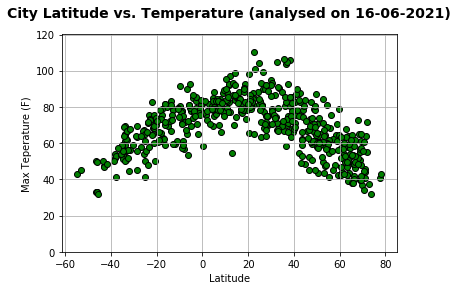

In [9]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Temperature (F)']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Temperature (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Max Teperature (F)")
plt.ylim(0,max(raw_data_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatTemp.png")
plt.show()


## Latitude vs. Humidity Plot

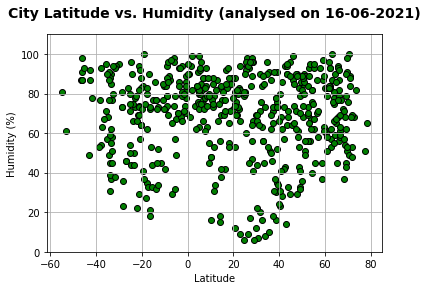

In [10]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Humidity']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Humidity (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,max(raw_data_df["Humidity"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

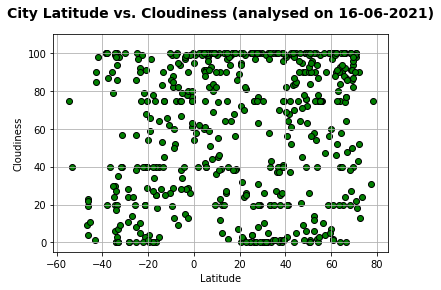

In [11]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Cloudiness']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-5,max(raw_data_df["Cloudiness"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

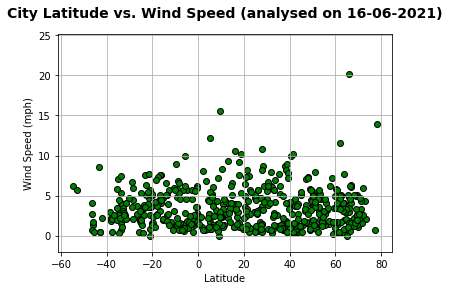

In [12]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Wind Speed']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,max(raw_data_df["Wind Speed"])+5)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatWSpeed.png")
plt.show()

## Linear Regression

In [13]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude)
northern_hemisphere_df = raw_data_df.loc[raw_data_df["Lat"]>=0,:]
northern_hemisphere_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)
1,Kapaa,22.0752,-159.3190,300.14,80,24,0.89,US,1624125440,80.85
2,Havøysund,70.9963,24.6622,280.64,89,98,1.94,NO,1624125441,45.75
3,Tuktoyaktuk,69.4541,-133.0374,289.15,51,40,5.14,CA,1624125441,61.07
4,Dharampur,20.5333,73.1833,299.61,81,95,4.98,IN,1624125441,79.90
5,Santa Cruz de las Flores,20.4833,-103.5000,291.58,88,100,3.54,MX,1624125442,65.44
...,...,...,...,...,...,...,...,...,...,...
517,Trofors,65.5333,13.4063,284.79,77,100,1.10,NO,1624125634,53.22
518,Khanbari,27.3747,87.2039,294.58,96,100,0.87,NP,1624125634,70.84
524,Fort Nelson,58.8053,-122.7002,294.48,37,56,1.68,CA,1624125603,70.66
525,Kutum,14.2000,24.6667,303.32,18,27,4.05,SD,1624125637,86.58


In [14]:
#separate the plots into Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere_df =  raw_data_df.loc[raw_data_df["Lat"]<0,:]
south_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)
0,Bluff,-46.6000,168.3333,273.60,87,9,4.06,NZ,1624125440,33.08
6,Rikitea,-23.1203,-134.9692,297.14,73,91,7.58,PF,1624125442,75.45
7,Vaini,-21.2000,-175.2000,295.24,94,20,2.57,TO,1624125442,72.03
8,Buin,-33.7333,-70.7500,291.51,37,86,0.71,CL,1624125443,65.32
10,Souillac,-20.5167,57.5167,295.36,64,40,5.14,MU,1624125443,72.25
...,...,...,...,...,...,...,...,...,...,...
521,Neiafu,-18.6500,-173.9833,298.72,75,97,6.89,TO,1624125635,78.30
522,Namatanai,-3.6667,152.4333,298.32,84,28,2.50,PG,1624125636,77.58
523,São Domingos do Maranhão,-5.5758,-44.3853,306.85,32,28,2.88,BR,1624125636,92.93
526,Nabire,-3.3667,135.4833,296.87,93,99,1.50,ID,1624125637,74.97


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.7154


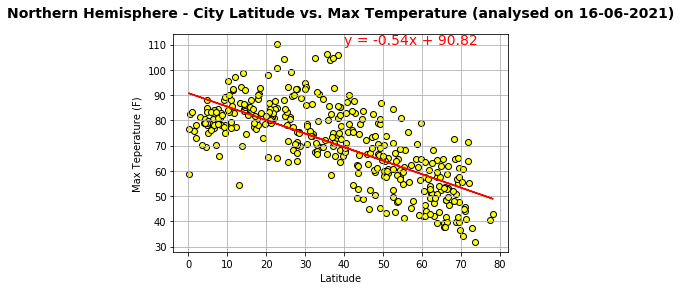

In [15]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Temperature (F)']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Max Teperature (F)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,110),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/NH_LatTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.765


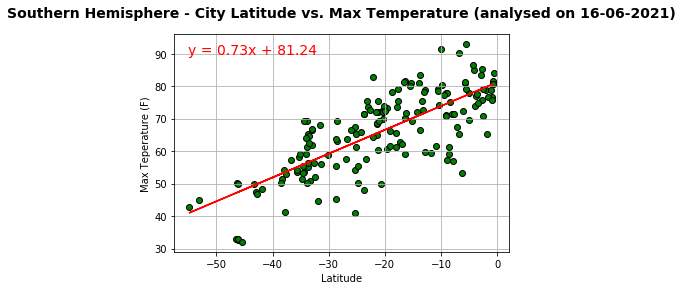

In [16]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Temperature (F)']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Max Teperature (F)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )
plt.savefig("../WeatherPy/SH_LatTemp.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is -0.0352


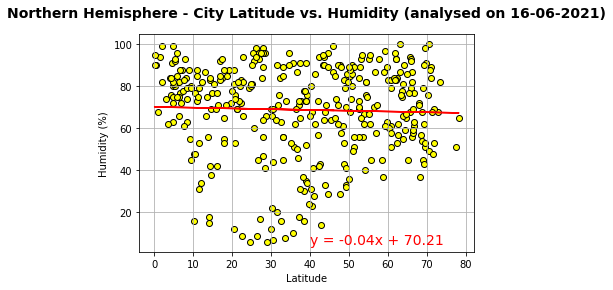

In [17]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )
plt.savefig("../WeatherPy/NH_LatHumid.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.0359


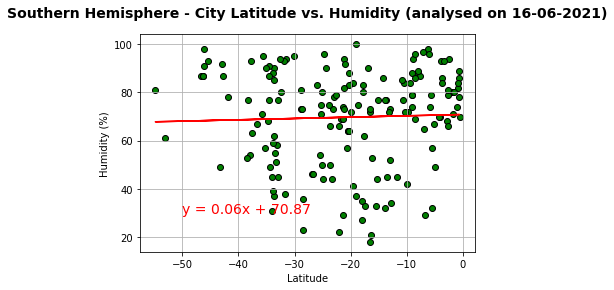

In [18]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Humidity']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )
plt.savefig("../WeatherPy/SH_LatHumid.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is -0.0132


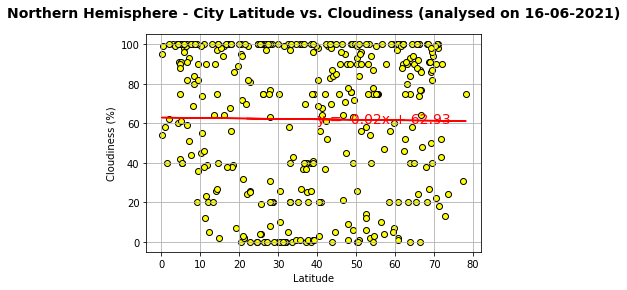

In [19]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/NH_LatCloud.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.2158


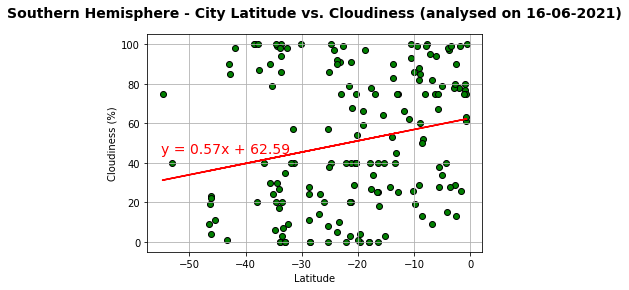

In [20]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Cloudiness']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/SH_LatCloud.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.0217


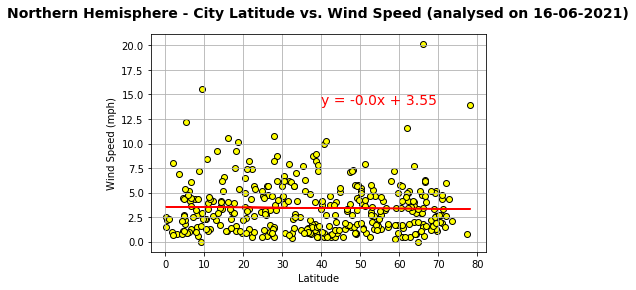

In [21]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/NH_LatWSpeed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.0658


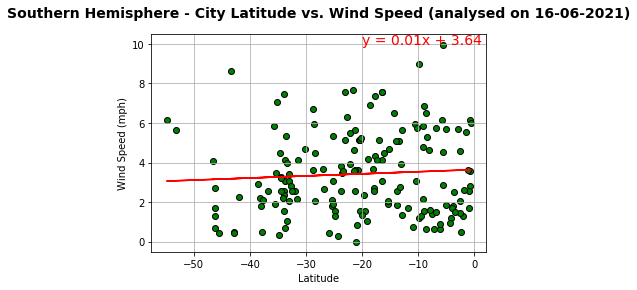

In [22]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Wind Speed']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/SH_LatWSpeed.png")

plt.show()

Key takeaways:
    
    1) an initial analysis of the scatter plots suggests that data is more closely scattered for the latitude and temperature relation, indicating that there might be a stronger correlation between these two variables
    2) More detailed linear regression analysis confirms this argument:
        a)  The correlation between Max Temp vs. Latitude Linear Regression in Northern Hemisphere is relatively strong (-0.72) and the relation is inverse, meaning that the higher the latitude is, the lower the temperature gets. 
        b)  The correlation between Max Temp vs. Latitude Linear Regression in Southern Hemisphere is also relatively strong (0.77) and the relation is direct, meaning that the higher the latitude is, the higher the temperature gets.
    3) the correlation between latitude and other variables such as wind speed, cloudiness and humidity was very weak for both Northern and Southern Hemispheres, suggesting that the latitude does have an impact on the cloudiness, humidity or the wind speed.